In [208]:
import os
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv 
import pandas as pd
import numpy as np
%matplotlib inline
from pandas import DataFrame, read_csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import scipy.special as sse
from scipy.stats import chisquare
from scipy import integrate 



In [209]:
cd E:\Leslie_Sipm\TEST3\Areas3

E:\Leslie_Sipm\TEST3\Areas3


In [210]:
os.listdir()

['0.0OD', '1.0OD', '1.5OD', '2.0OD', 'NO_LIGHT']

In [220]:
Folders = os.listdir()
Files = dict()
areas=dict()
correctedareas=dict()
cnbins= 200
chist= dict()
cbin_edges = dict()
cbin_centres = dict()
cSD = dict()
mean=dict()
SD=dict()

for x in range(0,len(Folders)):
    Files[x] = glob.glob(Folders[x]+"\*.csv")
    df = pd.concat((pd.read_csv(f,header=None) for f in Files[x]), axis=1)
    rows = len(df[0])
    columns = len(Files[x])
    new_length = rows*columns
    areas[x] = df.values.reshape(new_length,1)
    mean[x]  = float(sum(areas[x]))/len(areas[x]) if len(areas[x]) > 0 else float('nan')  
    SD[x]    = np.std(areas[x])
    correctedareas[x] = areas[x]-1.850125048253344e-07
    chist[x], cbin_edges[x] = np.histogram(correctedareas[x] , cnbins)
    cbin_centres[x] = (cbin_edges[x][:-1] + cbin_edges[x][1:])/2
    cmean[x]  = mean[x]- 1.850125048253344e-07
    cSD[x]    = np.std(correctedareas[x])

In [238]:
p=dict()
coeff=dict()
var_matrix=dict()

def gauss(x, *p):                                               #defines gaussian fit
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

for x in range(0,len(Folders)):
    p[x] = [1., cmean[x], cSD[x]]                                             #estimation of parameters
    coeff[x], var_matrix[x] = curve_fit(gauss, cbin_centres[x], chist[x], p0=p[x])

In [250]:
colorss=['b', 'g', 'c', 'steelblue', 'k', 'brown']

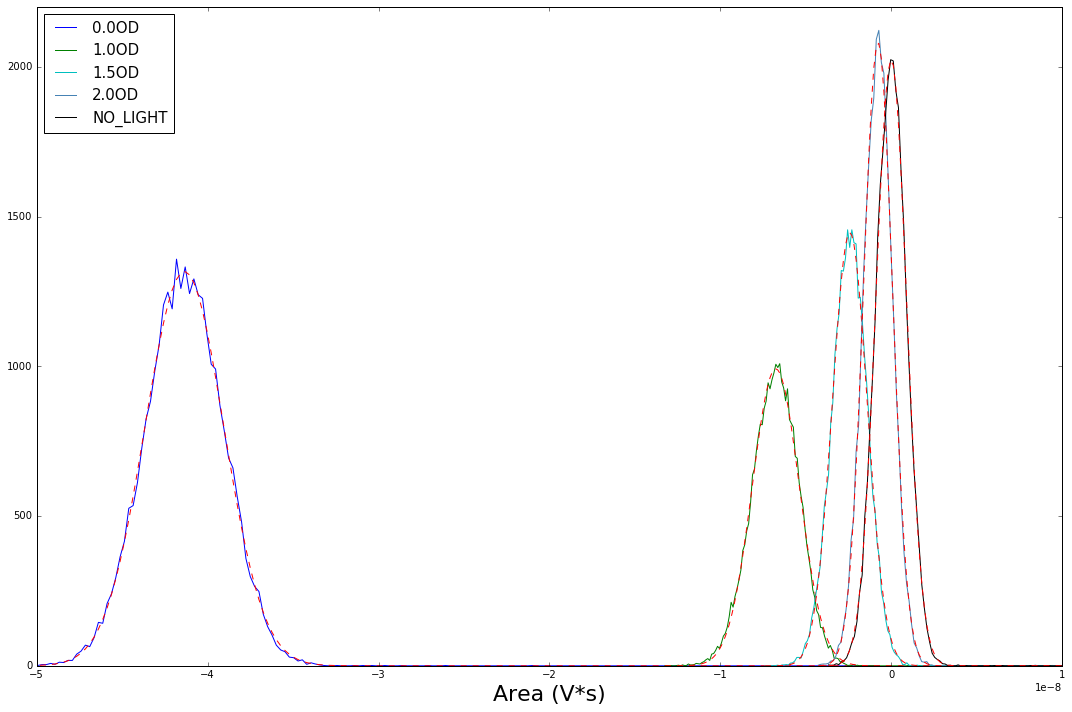

In [260]:
plt.figure(figsize=(15,10))
for x in range(0,len(Folders)):
    plt.plot(cbin_centres[x],chist[x], label = Folders[x],color = colorss[x])
    plt.plot(cbin_centres[x],gauss(cbin_centres[x],*coeff[x]),'r--') 

plt.xlabel('Area (V*s)',fontsize=22)
#plt.ylabel('Intensity (arb.units)',fontsize=32)
#plt.title('Fluo4 E-field',fontsize=32)

plt.legend(loc='upper left',fontsize=15)
plt.xlim(-0.5e-7,.1e-7)
plt.ylim(0,2200)

plt.tight_layout()

#plt.savefig('AreaHist.pdf')
plt.show()

In [257]:
photons=dict()
for x in range(0,len(Folders)-1):
    photons[x] = coeff[x][1]**2/coeff[x][2]**2

In [178]:
optdensity = [0,1,1.5,2]

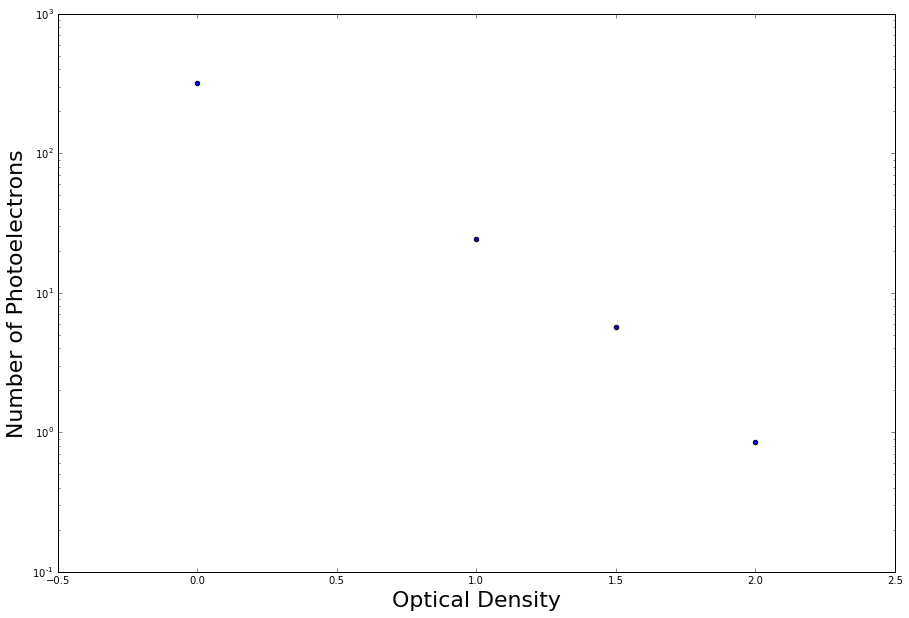

In [259]:
plt.figure(figsize=(15,10))
for x in range(0,len(Folders)-1):
    plt.scatter(optdensity[x], photons[x])
    plt.yscale('log')
#    plt.xlim(0,2.5)
#    plt.ylim(1e-38,1e-31)
    plt.ylabel('Number of Photoelectrons',fontsize=22)
    plt.xlabel('Optical Density',fontsize=22)

#plt.savefig('NumOfPE.pdf')
plt.show()

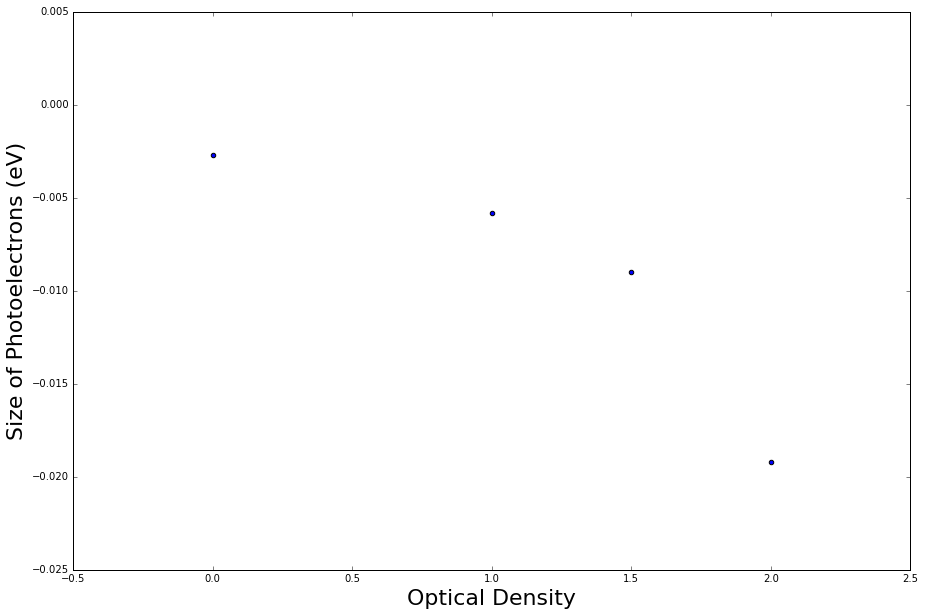

In [271]:
plt.figure(figsize=(15,10))
for x in range(0,len(Folders)-1):
    plt.scatter(optdensity[x], coeff[x][1]/photons[x]/48e-9)

#    plt.xlim(0,2.5)
#    plt.ylim(-1e-3,1e-3)
    plt.ylabel('Size of Photoelectrons (eV)',fontsize=22)
    plt.xlabel('Optical Density',fontsize=22)

#plt.savefig('SizeOfPE.pdf')
plt.show()

In [269]:
coeff[x][1]/photons[x]/48e-9

-0.019186184895991547